Importing the required modules

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

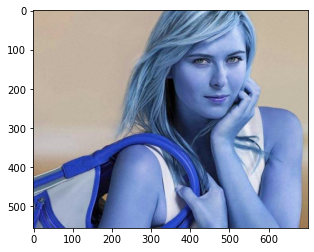

In [6]:
plt.imshow(img)

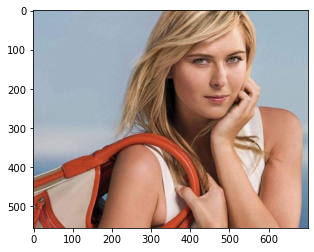

In [8]:
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(image)

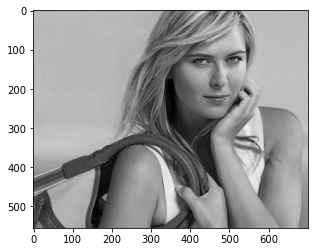

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

In [12]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[356,  37, 233, 233]], dtype=int32)

In [13]:
(x,y,w,h)=faces[0]
x,y,w,h

(356, 37, 233, 233)

In [ ]:
face_img=cv2.rectangle()